In [41]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

%matplotlib notebook
%matplotlib inline

# File to Load 
athlete_bio = Path("data/Olympic_Athlete_Bio.csv")
event_results = Path("data/Olympic_Athlete_Event_Results.csv")
medal_tally = Path("data/Olympic_Games_Medal_Tally.csv")
results = Path("data/Olympic_Results.csv")
country = Path("data/Olympics_Country.csv")
games = Path("data/Olympics_Games.csv")

# Read School and Student Data File and store into Pandas DataFrames
bio_data = pd.read_csv(athlete_bio)
event_results_data = pd.read_csv(event_results)
medal_tally_data = pd.read_csv(medal_tally)
results_data = pd.read_csv(results)
country_data = pd.read_csv(country)
games_data = pd.read_csv(games)

In [42]:
medal_tally_data.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [43]:
medal_tally_data.nunique()

edition         55
edition_id      55
year            38
country        154
country_noc    154
gold            51
silver          44
bronze          43
total           96
dtype: int64

In [44]:
medal_tally_df = pd.DataFrame(medal_tally_data) #Convert original csv file into dataframe
Exclude_strings = ['Winter', 'Intercalated', 'Equestrian'] #Create list of string values we want excluded from the dataset we want to look at
summer_only_df = medal_tally_df[~medal_tally_df['edition'].str.contains('|'.join(Exclude_strings), case=False)] #Create df containing only summer olympics
summer_only_df

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1


In [45]:
country_count_per_year = summer_only_df.groupby('year')['country'].nunique().reset_index()
country_count_per_year.head()




,year,country
0,1896,11
1,1900,19
2,1904,8
3,1908,19
4,1912,19


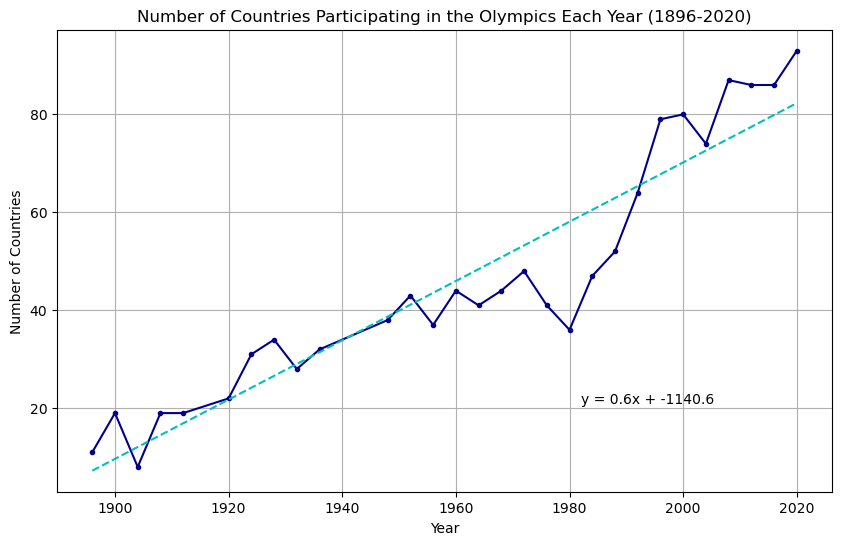

In [91]:
country_count_per_year = summer_only_df.groupby('year')['country'].nunique().reset_index()

x_values = country_count_per_year['year']
y_values = country_count_per_year['country']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='.', color='darkblue', linestyle='-')
plt.plot(x_values,regress_values,"c--")
plt.annotate(line_eq,(1982,21),fontsize=10,color="black")

plt.title('Number of Countries Participating in the Olympics Each Year (1896-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()